In [21]:
using Images
using PyPlot


# Create 3x3 derivative filters in x and y direction
function createfilters()
xder=[ -0.5 0 0.5 ]
ygaus=[ 0.25 ;0.5; 0.25]

yder=[-0.5 ; 0; 0.5]

xgaus= [0.25 0.5 0.25]

fx=ygaus*xder

fy=yder*xgaus
  return fx::Array{Float64,2},fy::Array{Float64,2}
end


# Apply derivate filters to an image and return the derivative images
function filterimage(I::Array{Float32,2},fx::Array{Float64,2},fy::Array{Float64,2})

Ix=imfilter(I, fx, [border="replicate"])
Iy=imfilter(I, fy, [border="replicate"])

  return Ix::Array{Float64,2},Iy::Array{Float64,2}
end


# Apply thresholding on the gradient magnitudes to detect edges
function detectedges(Ix::Array{Float64,2},Iy::Array{Float64,2}, thr::Float64)
edges = (Ix.^2+Iy.^2).^(1/2)
edges = edges.*(edges.>thr) #multiply by 1 if greater than threshold
  return edges::Array{Float64,2}
end


# Apply non-maximum-suppression
function nonmaxsupp(edges::Array{Float64,2},Ix::Array{Float64,2},Iy::Array{Float64,2})
tan_angle = atan2(Iy,Ix)
for i=1:size(tan_angle,1)
for j=1:size(tan_angle,2)
    if(tan_angle[i,j]<pi/8 && tan_angle[i,j]>=-pi/8) #take approx angle of grandient to nearest multiple of pi/4
        tan_angle[i,j] = 0
    elseif(tan_angle[i,j]>=pi/8 && tan_angle[i,j]<3pi/8)
        tan_angle[i,j] = pi/4
    elseif(tan_angle[i,j]>=3pi/8 || tan_angle[i,j]<5pi/8)
        tan_angle[i,j] = pi/2
    elseif(tan_angle[i,j]>=5*pi/8 && tan_angle[i,j]<7*pi/8) 
        tan_angle[i,j] = 3pi/4
    elseif(tan_angle[i,j]>=7pi/8 || tan_angle[i,j]<-7pi/8)
        tan_angle[i,j] = 0
    elseif(tan_angle[i,j]>=-7pi/8 || tan_angle[i,j]<-5pi/8)
        tan_angle[i,j] = pi/4 
    elseif(tan_angle[i,j]>=-5pi/8 || tan_angle[i,j]<-3pi/8)
        tan_angle[i,j] = pi/2 
    elseif(tan_angle[i,j]>=-3pi/8 || tan_angle[i,j]<-pi/8)
        tan_angle[i,j] = 3pi/4
    end
end
end
    
for i=2:size(edges,1)-1
    for j=2:size(edges,2)-1
        
        #edges[i-1,j-1]+edges[i+1,j+1] #left_diagonal
        #edges[i-1,j+1]+edges[i+1,j-1] #right-diagonal
        #edges[i,j-1]+edges[i,j+1]  #x-axis
        #edges[i-1,j]+edges[i+1,j]  #y-axis
        #based on angle get orthogonal direction
        if(edges[i,j]>0)
            if(tan_angle[i,j]==pi/4)       #means approx ortho is in 45 degrees to x-axis
                if(edges[i,j]<edges[i-1,j+1] || edges[i,j]<edges[i+1,j-1])
                    edges[i,j]=0
                end
                
            elseif(tan_angle[i,j]==3pi/4)  #means approx ortho is in 135 degrees to x-axis
                if(edges[i,j]<edges[i-1,j-1] || edges[i,j]<edges[i+1,j+1])
                    edges[i,j]=0
                end
            elseif(tan_angle[i,j]==pi/2)  #means ortho is in y-axis
                if(edges[i,j]<edges[i-1,j] || edges[i,j]<edges[i+1,j])
                    edges[i,j]=0
                end
            elseif(tan_angle[i,j]==0) #means ortho is in x-axis
                if(edges[i,j]<edges[i,j-1] || edges[i,j]<edges[i,j+1])
                    edges[i,j]=0
                end
        end
        end
        
    end
end
  edges =  1.0 .* (edges .> 0)  # pkj added
  return edges::Array{Float64,2}
end








nonmaxsupp (generic function with 1 method)

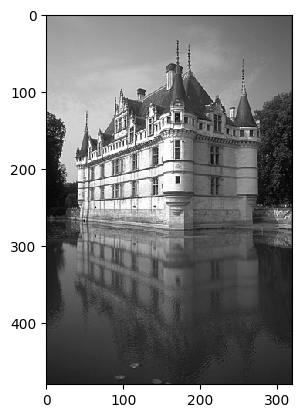

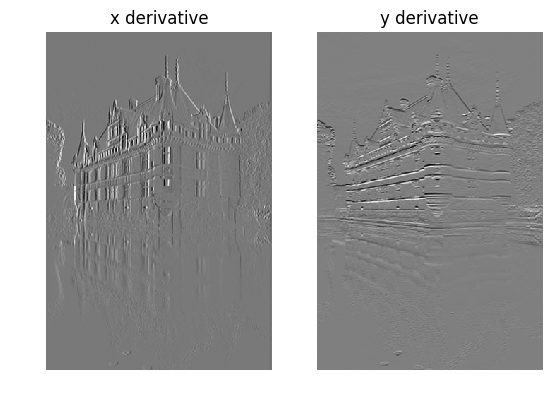

(-0.5, 319.5, 479.5, -0.5)

In [23]:

  # load image
  img = PyPlot.imread("a1p4.png")
  PyPlot.imshow(img,"gray")

  # create filters
  fx, fy = createfilters();

  # filter image
  imgx, imgy = filterimage(img, fx, fy);

  # show filter results
  figure()
  subplot(121)
  imshow(imgx, "gray", interpolation="none");
  title("x derivative")
  axis("off")
  subplot(122)
  imshow(imgy, "gray", interpolation="none");
  title("y derivative")
  axis("off")
 

 

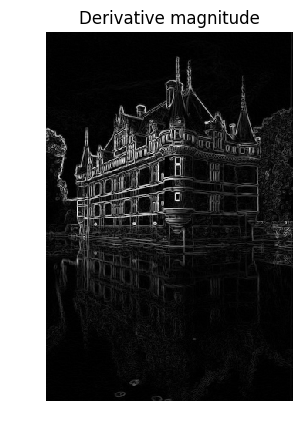

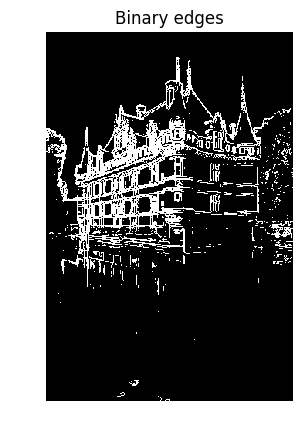

PyObject Text(0.5,1,'Binary edges')

In [24]:
 # show gradient magnitude
  figure()
  imshow(sqrt(imgx.^2 + imgy.^2),"gray", interpolation="none")
  axis("off")
  title("Derivative magnitude")
  gcf()

  # threshold derivative  
  #optimal threshold was found after checking the clarity of edges for various range of threshold
  #high threshold causes details on the right side of the building to dimnish whereas low threshold gives lot of noise
  threshold = 0.070
  edges = detectedges(imgx,imgy,threshold)
  figure()
  imshow(edges.>0, "gray", interpolation="none")
  axis("off")
  title("Binary edges")
 




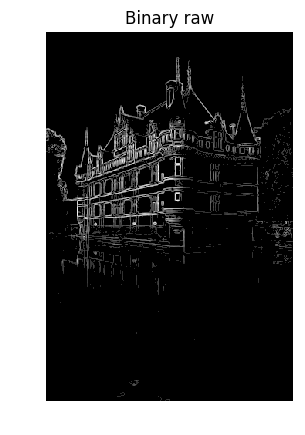

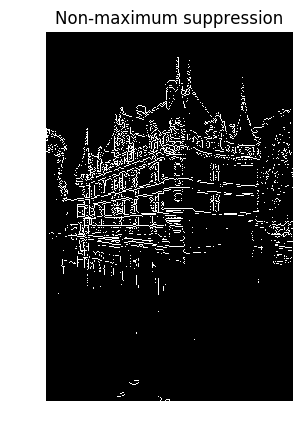

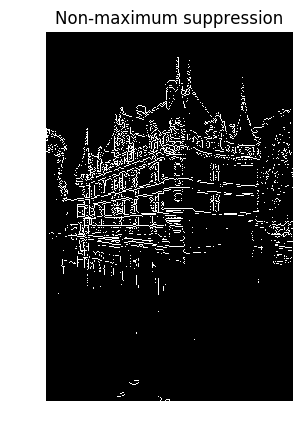

In [8]:

  figure()
  imshow(edges,"gray", interpolation="none")
  axis("off")
  title("Binary raw")
  # non maximum suppression
  edges2 = nonmaxsupp(edges,imgx,imgy)
  figure()
  imshow(edges2,"gray", interpolation="none")
  axis("off")
  title("Non-maximum suppression")
 